In [1]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sweetviz
import pandas as pd

In [4]:
train = pd.read_csv("d:/data/titanic/train.csv")
test = pd.read_csv("d:/data/titanic/test.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We now have 2 dataframes (train and test), and we would like to analyze the target value “Survived”. I want to point out in this case we know the name of the target column in advance, but it is always optional to specify a target column. We can generate a report with this line of code:

In [8]:
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Survived")

                                             |          | [  0%]   00:00 -> (? left)

Running this command will perform the analysis and create the report object. To get the output, simply use the show_html() command:

In [9]:
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### FeatureConfig: forcing data types, skipping columns
In many cases, there are “label” columns that you may not want to analyze (although target analysis can provide insights on the distribution of target values based on labeling). In other cases, you may want to force some values to be marked as categorical even though they are numerical in nature.

To do all this, simply create a FeatureConfig object and pass it in to the analyze/compare function. You can specify either a string or a list to kwargs skip, force_cat and force_text:

In [10]:
feature_config = sweetviz.FeatureConfig(skip="PassengerId", force_cat=["Ticket"])
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Survived", feature_config)

                                             |          | [  0%]   00:00 -> (? left)

#### Comparing sub-populations (e.g. Male vs Female)
Even if you are only looking at a single dataset, it can be very useful to study the characteristics of different subpopulations within that dataset. To do so, Sweetviz provides the compare_intra() function. To use it, you provide a boolean test that splits the population (here we try train["Sex"] == 'male', to get a sense of the different gender populations), and give a name to each subpopulation. For example:

In [11]:
my_report = sweetviz.compare_intra(train, train["Sex"] == 'male', ["Male", "Female"], 'Survived')
my_report.show_html() # Not providing a filename will default to SWEETVIZ_REPORT.html

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


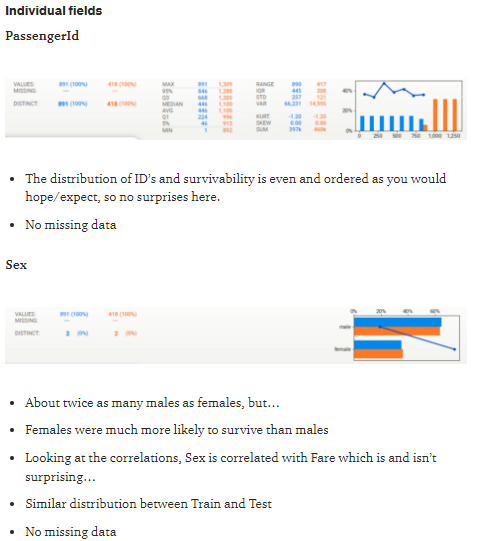

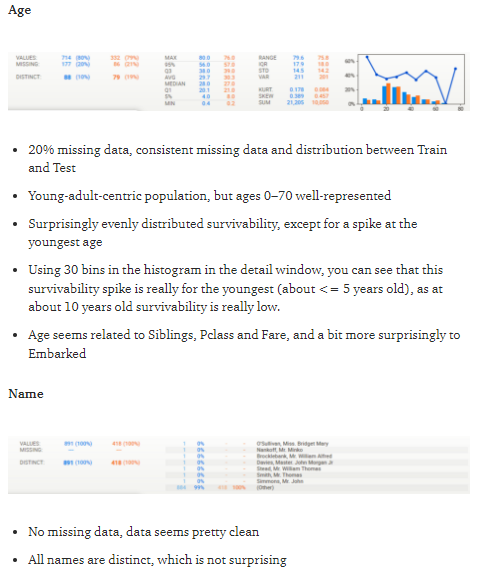

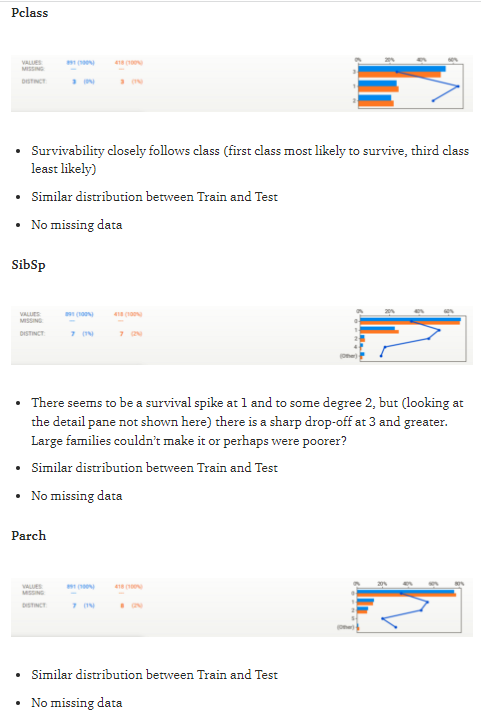

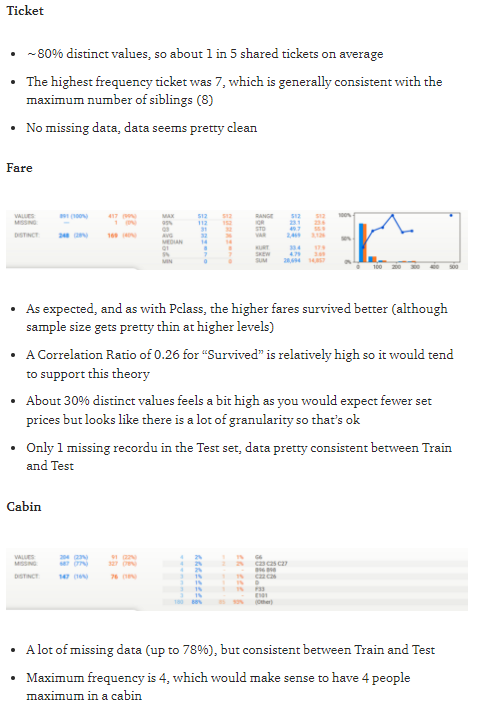

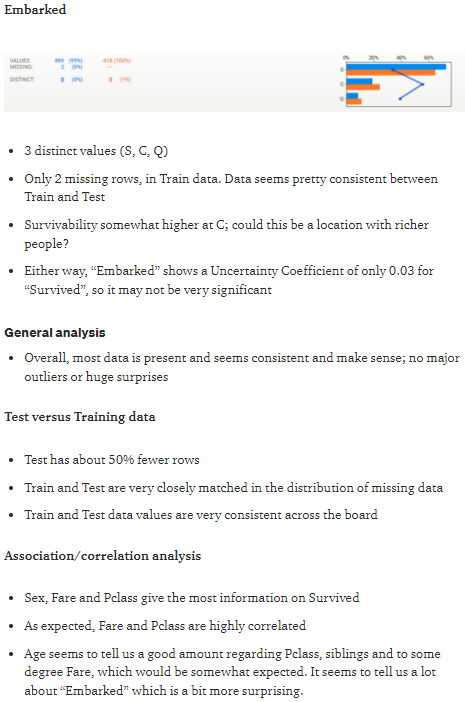

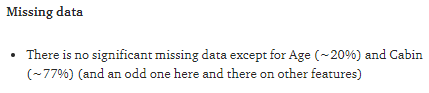